In [1]:
import numpy as np
from pylab import *
from astropy import units as u


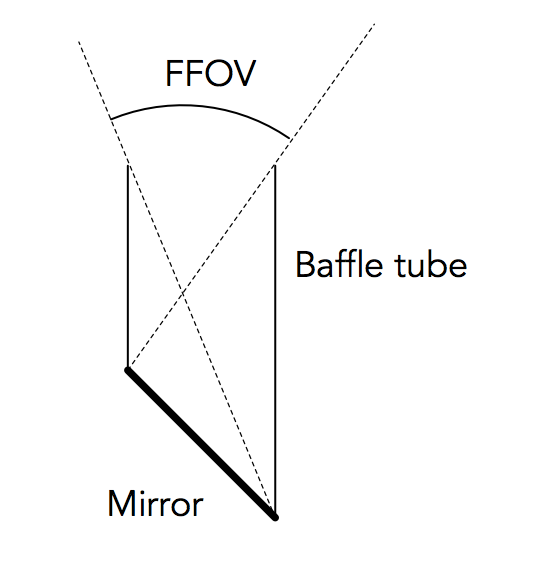

In [22]:

# Baffle
FFOV = 35. # deg -- This is the angle that there is a direct path to M1 from sky
skyArea = np.pi * (FFOV/2)**2


# Telescope
TelArea = np.pi * (80 * u.mm)**2
fno = 11.4

# Lenslet
spaxel_ffov_as = 35

# Spectrograph
R = 4000 # Spectral Resolution
Ha = 6563 * u.Angstrom
dl = Ha/R 


# Survey
efficiency = 0.4 # Number of detected photons
exptime = 15*u.min



In [23]:
# Sky count: http://www.hnsky.org/star_count.htm


nm = np.array([np.arange(3,11), [0.004629966, 0.013526289, 0.042275713, 0.129105762, 
                           0.400043633, 1.177102271, 3.378542167, 9.282355223]]).T

In [24]:
# Assume catalog values above are Vega
def vega_to_fl(vega):
    global vega_scale
    vega_scale = 1000 * u.photon / u.s / u.cm**2 / u.Angstrom
    
    return 10**(-vega/2.5) * vega_scale

def fl_to_vega(fl):
    global vega_scale
    
    return -2.5*np.log10(fl/vega_scale)



fl_to_vega(vega_to_fl(2)) 

<Quantity 2.>

In [25]:
flux = 0
for row in list(nm):
    mag, den = row
    num = den * skyArea
    flux += vega_to_fl(mag)
    print(mag, num, fl_to_vega(flux))

3.0 4.454549321415972 3.0
4.0 13.013815109274306 2.636148842226766
5.0 40.6740024994841 2.5195598831030273
6.0 124.2142997395644 2.4764187568683167
7.0 384.88707993037747 2.459709937151354
8.0 1132.5051031735977 2.4531289441127715
9.0 3250.538495830228 2.4505200646304917
10.0 8930.672311579967 2.449483193088424


Consequence of above calculation is that within the FFOV there is a star with magnitude 2.5 Vega or so

Number of photon on aperture is below.

In [26]:
dl

<Quantity 1.64075 Angstrom>

In [27]:
n_photon_scattered_total = (flux * TelArea * dl * exptime).to(u.photon)
print(np.log10(n_photon_scattered_total/u.photon))

7.492821491810937


In [30]:
# Solid angle of telescope
Omega = np.pi/(2*fno)**2

Delta_n = 2 # Mirror
sigma = 2 * u.nm
lam = 656 * u.nm
TIS = (2*np.pi*Delta_n*sigma/lam)**2



BSDF_lambertian = TIS/np.pi


sci_field = spaxel_ffov_as/206265
Omega_Fov = np.pi*np.sin(sci_field)


n_scattered_in_spaxel = BSDF_lambertian * Omega_Fov * n_photon_scattered_total * efficiency

print("Num of photons in a fiber-tip image: %3.1f %s" % 
      (n_scattered_in_spaxel.value, n_scattered_in_spaxel.unit))

Num of photons in a fiber-tip image: 3.1 ph


What is the goal? Faintest geocoronal signal of 0.1 R is 7 photon / fiber tip image. So having a scattered light signal that's half the geocoronal signal is good.